This notebook is for the AIPI510 Data Storytelling project. My part of this project is looking at EV sales across different countries, models, and overall growth in order to find patterns in EV sales trends as well as provide a complete picture of the EV market over the last 10 years. 

To start with, I will upload all of the CSV files I obtained online and read them in. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
model_sales = pd.read_csv(r"C:\AIPI510\EV_project\Electric Car Sales by Model in USA.csv")
data_explorer = pd.read_csv(r"C:\AIPI510\EV_project\IEA-EV-dataEV salesCarsHistorical.csv")

#full data
path = "C:\AIPI510\EV_project\EVDataExplorer2025.xlsx"
country_data= pd.read_excel(path, sheet_name=3)


In [3]:
#visualize data briefly 
model_sales.head()
data_explorer.head()
country_data.head()

#na values 
model_sales.isna().sum()
data_explorer.isna().sum()
country_data.isna().sum()

#few na values 

parameter       1
EV sales       35
Unnamed: 2     29
Unnamed: 3     27
Unnamed: 4     25
Unnamed: 5     25
Unnamed: 6     14
Unnamed: 7     12
Unnamed: 8     12
Unnamed: 9     11
Unnamed: 10     8
Unnamed: 11     8
Unnamed: 12     7
Unnamed: 13     7
Unnamed: 14     6
Unnamed: 15     7
dtype: int64

    year     value
0   2010     18574
1   2011    114463
2   2012    283006
3   2013    510321
4   2014    810547
5   2015   1411417
6   2016   1835620
7   2017   2815219
8   2018   4693645
9   2019   5148213
10  2020   8359524
11  2021  17036811
12  2022  24862183


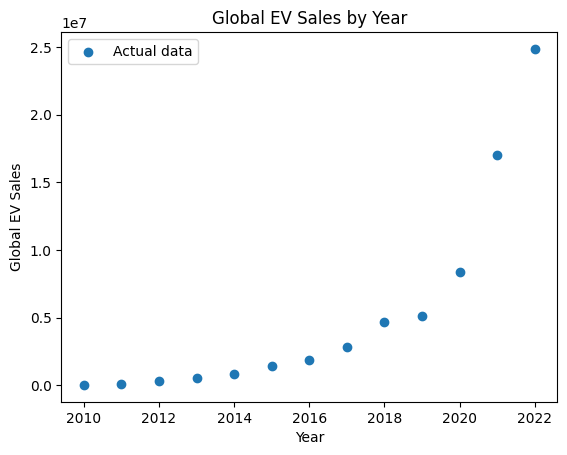

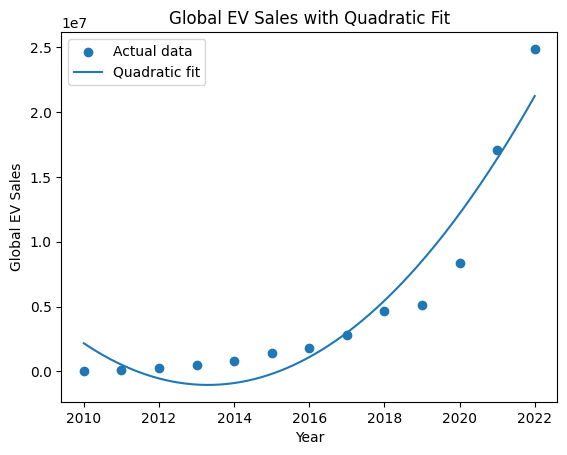

Quadratic fit equation: y = 2.943787e+05*x^2 + -1.185347e+09*x + 1.193230e+12


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# aggregate global growth
yearly_sales = data_explorer.groupby("year")["value"].sum().reset_index()

# print the yearly sales table
print(yearly_sales)

# plot 1: scatter only (no fit)
plt.figure()
x = yearly_sales["year"].values
y = yearly_sales["value"].values
plt.scatter(x, y, label="Actual data")
plt.xlabel("Year")
plt.ylabel("Global EV Sales")
plt.title("Global EV Sales by Year")
plt.legend()
plt.show()

# plot 2: scatter + quadratic fit
plt.figure()
plt.scatter(x, y, label="Actual data")

# quadratic fit
coeffs = np.polyfit(x, y, 2)   # [a, b, c]
quad = np.poly1d(coeffs)
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = quad(x_fit)

plt.plot(x_fit, y_fit, label="Quadratic fit")
plt.xlabel("Year")
plt.ylabel("Global EV Sales")
plt.title("Global EV Sales with Quadratic Fit")
plt.legend()
plt.show()

# print the quadratic equation below (not on the plot)
a, b, c = coeffs
print(f"Quadratic fit equation: y = {a:.6e}*x^2 + {b:.6e}*x + {c:.6e}")


The first part of the analysis that I did was grouping the data by year and summing the value per year. From the numbers alone we see how from 2010-2015 the sales are pretty stagnant before starting to blow up from 2018-2022. I then plotted it to show the trend, which led me to believe it has a quadratic nature. By using a fitting funciton, I determined the polinomial fit for this equation. 

In [5]:
#Last 5 years
yearly_sales_last_five = data_explorer[data_explorer['year']>2017]
print(yearly_sales_last_five.head())

#country sales 
country_totals = yearly_sales_last_five.groupby("region")["value"].sum().reset_index()

#top 5 
top5 = country_totals.sort_values("value", ascending=False).head(5)
print(top5)

#now, last year alone 
last_year_sales = data_explorer[data_explorer['year']==2022]
country_total_one = last_year_sales.groupby("region")["value"].sum().reset_index()
top1 = country_total_one.sort_values("value", ascending = False).head(5)
print(top1)

       region    category parameter  mode powertrain  year      unit  value
13  Australia  Historical  EV sales  Cars        BEV  2018  Vehicles   1800
14  Australia  Historical  EV sales  Cars       PHEV  2018  Vehicles   1800
15  Australia  Historical  EV sales  Cars       PHEV  2019  Vehicles   2900
16  Australia  Historical  EV sales  Cars        BEV  2019  Vehicles   6300
17  Australia  Historical  EV sales  Cars        BEV  2020  Vehicles   5200
    region     value
35   World  23800000
6    China  12440000
9   Europe   7240000
8     EU27   5410000
33     USA   2599000
    region     value
35   World  10200000
6    China   5900000
9   Europe   2600000
8     EU27   1980000
33     USA    990000


The last code block groups by the region and then ranks the top 5. The number 1 is the rest of the world, but right after that is China followed by Europe (not a country obviously) and then USA is fifth. In the last year alone, China's EV value is 5900000 while the US is 990000, meaning that China's is about 5-6x as much as the US in the last year. This makes sense as the EV batteries are primarlily made in China and they have a much higher population as well. 

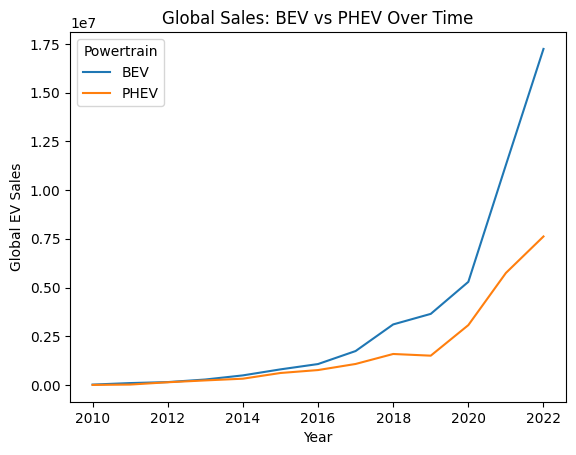

In [6]:
#looking at bev vs phev 
import matplotlib.pyplot as plt
import seaborn as sns

bevphev = data_explorer.groupby(["year", "powertrain"])["value"].sum().reset_index()

#plot bev vs phev

plt.figure()
sns.lineplot(data=bevphev, x="year", y="value", hue="powertrain")
plt.xlabel("Year")
plt.ylabel("Global EV Sales")
plt.title("Global Sales: BEV vs PHEV Over Time")
plt.legend(title="Powertrain")
plt.show()





This code essentially grouped the data by year and powertrain type, so creates a year and BEV and the same year and PHEV. BEV is a pure battery electric vehicle while PHEV is a battery and gasoline electric vehicle. We see that both types are about as common up until 2016, when the BEV begins to gain popularity more than the PHEV, although the PHEV also gained popularity after 2016 as well. 

In [7]:
#looking into model sales 
model_sales.head()




,Make,Model,Logo,janv-12,Feb 2012,mars-12,Apr 2012,May 2012,juin-12,juil-12,...,mars-19,Apr 2019,May 2019,juin-19,juil-19,Aug 2019,sept-19,oct-19,nov-19,Dec 2019
0,Chevrolet,Volt,https://www.carlogos.org/logo/Chevrolet-logo-2...,603.0,1626.0,3915.0,5377.0,7057.0,8817.0,10666.0,...,146667.0,147072.0,"147,48","147,813","148,063","148,337","148,687","148,757","148,907","149,057"
1,Toyota,Prius PHV,https://www.carlogos.org/logo/Toyota-logo-1989...,0.0,21.0,912.0,2566.0,3652.0,4347.0,5035.0,...,42345.0,42345.0,42345,42345,42345,42345,42345,42345,42345,42345
2,Nissan,Leaf,https://www.carlogos.org/logo/Nissan-logo-2013...,676.0,1154.0,1733.0,2103.0,2613.0,3148.0,3543.0,...,122534.0,123485.0,"124,701","125,857","126,795","127,912","128,96","129,847","130,987","132,214"
3,Tesla,Model S,https://www.carlogos.org/logo/Tesla-logo-2003-...,0.0,NaN,NaN,NaN,NaN,12.0,31.0,...,147517.0,148342.0,"149,367","151,117","152,092","153,142","154,242","154,992","156,492","157,992"
4,Ford,C-Max Energi,https://www.carlogos.org/logo/Ford-logo-2003-1...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,42231.0,42231.0,42231,42231,42231,42231,42231,42231,42231,42231


In [13]:
import pandas as pd
import numpy as np
import re

# if you already have model_sales defined, keep this commented
# model_sales = pd.read_csv("path/to/your_file.csv")

# 1) identify id and value columns
id_cols = ["Make", "Model"]
extra_exclude = [c for c in model_sales.columns if str(c).lower() in {"logo", "image", "url"}]

month_keywords = [
    "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec",
    "janv", "févr", "fevr", "mars", "avr", "mai", "juin", "juil", "août", "aout", "sept", "déc", "dec"
]

value_cols = [
    c for c in model_sales.columns
    if c not in id_cols + extra_exclude
    and (any(k in str(c).lower() for k in month_keywords) or re.search(r"\d", str(c)) is not None)
]

# 2) melt wide → long
long = model_sales.melt(
    id_vars=id_cols,
    value_vars=value_cols,
    var_name="month_label",
    value_name="cumulative_sales"
)

# 3) robust numeric cleaning for cumulative_sales
def parse_sales(x):
    s = str(x).strip()
    if s in {"", "nan", "NaN", "None", "-", "—"}:
        return np.nan
    s = s.replace("\u00A0", "").replace(" ", "")
    if re.fullmatch(r"\d{1,3}(,\d{3})+", s):
        return float(s.replace(",", ""))
    m = re.fullmatch(r"(\d+),(\d{1,2})", s)
    if m:
        left, right = m.group(1), m.group(2).ljust(3, "0")
        return float(left + right)
    s2 = re.sub(r"[^\d\.\-]", "", s.replace(",", ""))
    try:
        return float(s2)
    except ValueError:
        return np.nan

long["cumulative_sales"] = long["cumulative_sales"].apply(parse_sales)

# 4) parse month labels to dates (handles "janv-12", "mars-12", "Feb 2012", "Apr 2019", etc.)
fr_map = {
    "janv": "Jan", "févr": "Feb", "fevr": "Feb", "mars": "Mar", "avr": "Apr",
    "mai": "May", "juin": "Jun", "juil": "Jul", "août": "Aug", "aout": "Aug",
    "sept": "Sep", "oct": "Oct", "nov": "Nov", "déc": "Dec", "dec": "Dec",
    "jan": "Jan", "feb": "Feb", "mar": "Mar", "apr": "Apr", "may": "May",
    "jun": "Jun", "jul": "Jul", "aug": "Aug", "sep": "Sep", "oct": "Oct",
    "nov": "Nov", "dec": "Dec"
}

def normalize_month(label):
    s = str(label).strip()
    s = s.replace("  ", " ").replace("_", " ")
    s = s.replace("–", "-").replace("—", "-")
    if "-" in s:
        m, y = s.split("-", 1)
    elif " " in s:
        m, y = s.split(" ", 1)
    else:
        return pd.NaT
    m = m.strip().lower()
    y = y.strip()
    m_norm = fr_map.get(m, m[:3].capitalize())
    if len(y) == 2 and y.isdigit():
        y = "20" + y
    return pd.to_datetime(f"1 {m_norm} {y}", format="%d %b %Y", errors="coerce")

long["date"] = long["month_label"].apply(normalize_month)

# drop rows with no date or missing ids, and sort chronologically per model
long = long.dropna(subset=["date"]).dropna(subset=id_cols).sort_values(["Make", "Model", "date"])

# drop models that have no numeric data at all
has_any_data = long.groupby(["Make", "Model"])["cumulative_sales"].transform(lambda s: s.notna().any())
long = long[has_any_data].copy()

# 5) cumulative → monthly per model (forward-fill gaps; diff; first month = first cumulative; clip negatives)
long = long.sort_values(["Make", "Model", "date"])
g = long.groupby(["Make", "Model"], group_keys=False)

long["cum_filled"] = g["cumulative_sales"].ffill()
long["cum_filled"] = long["cum_filled"].fillna(0)

long["monthly_sales"] = g["cum_filled"].diff()
first_mask = g["date"].transform("min").eq(long["date"])
long.loc[first_mask, "monthly_sales"] = long.loc[first_mask, "cum_filled"]

long["monthly_sales"] = long["monthly_sales"].clip(lower=0)

# 6) summaries and pivots
us_total_monthly = (
    long.groupby("date", as_index=False)["monthly_sales"].sum()
      .rename(columns={"monthly_sales": "US_total_monthly"})
)

top_models_alltime = (
    long.groupby(["Make", "Model"], as_index=False)["monthly_sales"].sum()
        .sort_values("monthly_sales", ascending=False)
        .head(10)
)

by_model = long.pivot_table(index="date", columns="Model", values="monthly_sales", aggfunc="sum")
by_make  = long.pivot_table(index="date", columns="Make",  values="monthly_sales", aggfunc="sum")

# 7) quick checks
print("Tidy long format (head):")
print(long[["Make","Model","month_label","date","cumulative_sales","cum_filled","monthly_sales"]].head(12))

print("\nUS total monthly (head):")
print(us_total_monthly.head())

print("\nTop 10 models by total monthly sales (all time):")
print(top_models_alltime)


Tidy long format (head):
     Make             Model month_label       date  cumulative_sales  \
28   Audi  A3 Sprtbk e-tron     janv-12 2012-01-01               NaN   
85   Audi  A3 Sprtbk e-tron    Feb 2012 2012-02-01               NaN   
142  Audi  A3 Sprtbk e-tron     mars-12 2012-03-01               NaN   
199  Audi  A3 Sprtbk e-tron    Apr 2012 2012-04-01               NaN   
256  Audi  A3 Sprtbk e-tron    May 2012 2012-05-01               NaN   
313  Audi  A3 Sprtbk e-tron     juin-12 2012-06-01               NaN   
370  Audi  A3 Sprtbk e-tron     juil-12 2012-07-01               NaN   
427  Audi  A3 Sprtbk e-tron    Aug 2012 2012-08-01               NaN   
484  Audi  A3 Sprtbk e-tron     sept-12 2012-09-01               NaN   
541  Audi  A3 Sprtbk e-tron      oct-12 2012-10-01               NaN   
598  Audi  A3 Sprtbk e-tron      nov-12 2012-11-01               NaN   
655  Audi  A3 Sprtbk e-tron    Dec 2012 2012-12-01               NaN   

     cum_filled  monthly_sales  
28   

This code above is for preparing the data to visualize - getting rid of NA values and pivoting the tables in a way to make visualization easier.

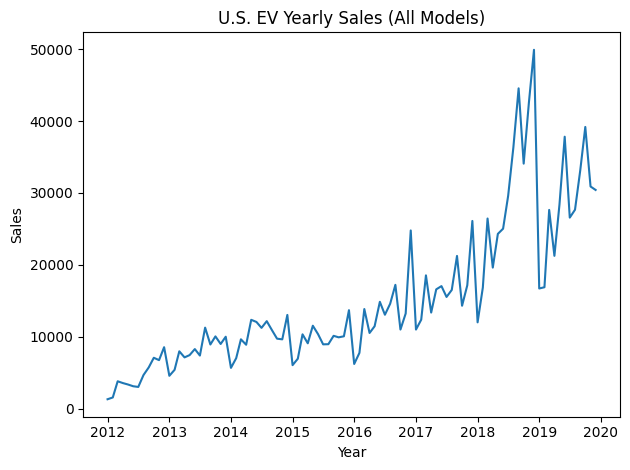

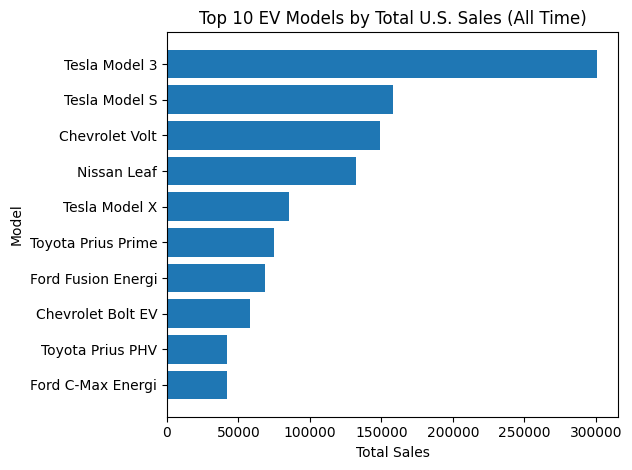

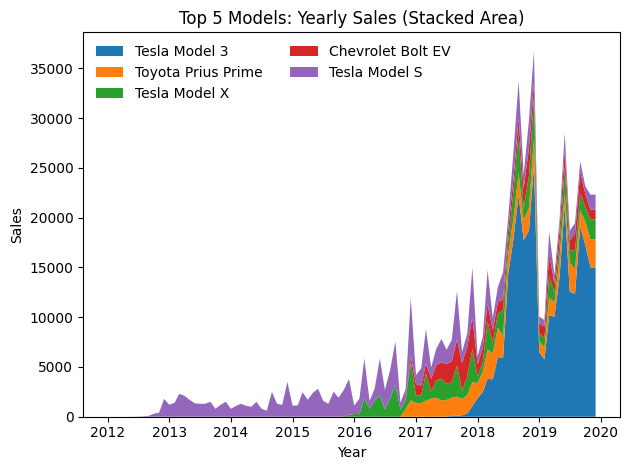

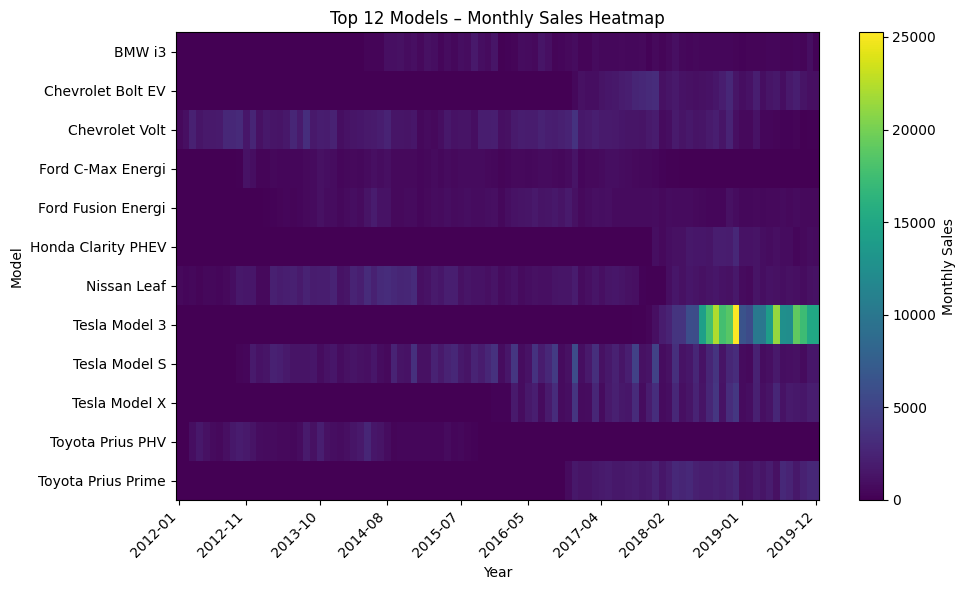

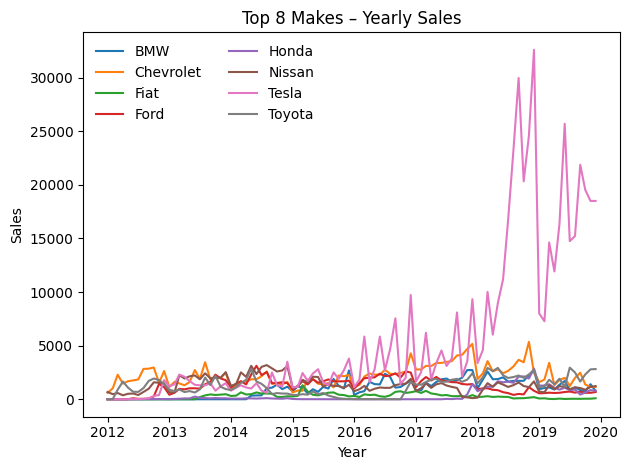

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter

# sanity check
required_cols = {"Make","Model","date","monthly_sales"}
missing = required_cols - set(long.columns)
if missing:
    raise ValueError(f"long is missing columns: {missing}. Run the tidy pipeline first.")

# helper: nicer date axis formatting
def format_date_axis(ax):
    locator = AutoDateLocator()
    formatter = ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

# 1) US total monthly EV sales over time (all models)
us_total_monthly = (
    long.groupby("date", as_index=False)["monthly_sales"].sum()
    .rename(columns={"monthly_sales": "US_total_monthly"})
)

plt.figure()
plt.plot(us_total_monthly["date"], us_total_monthly["US_total_monthly"])
plt.title("U.S. EV Yearly Sales (All Models)")
plt.xlabel("Year")
plt.ylabel("Sales")
format_date_axis(plt.gca())
plt.tight_layout()
plt.show()

# 2) Top 10 models by total sales (all time) – horizontal bar
top10_models = (
    long.groupby(["Make","Model"], as_index=False)["monthly_sales"].sum()
        .sort_values("monthly_sales", ascending=False)
        .head(10)
)
top10_models["label"] = top10_models["Make"] + " " + top10_models["Model"]

plt.figure()
plt.barh(top10_models["label"][::-1], top10_models["monthly_sales"][::-1])
plt.title("Top 10 EV Models by Total U.S. Sales (All Time)")
plt.xlabel("Total Sales")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# 3) Stacked area: top N models by last-12-months sales (cleaner story for current market)
N = 5
last_date = long["date"].max()
start_12m = (last_date - pd.offsets.DateOffset(months=11)).normalize().replace(day=1)

last12 = long[long["date"] >= start_12m]
topN_recent = (
    last12.groupby(["Make","Model"], as_index=False)["monthly_sales"].sum()
          .sort_values("monthly_sales", ascending=False)
          .head(N)
)
nameset = set(zip(topN_recent["Make"], topN_recent["Model"]))
mask = long[["Make","Model"]].apply(tuple, axis=1).isin(nameset)
topN_long = long[mask]

pivot_topN = topN_long.pivot_table(
    index="date",
    columns=topN_long["Make"] + " " + topN_long["Model"],
    values="monthly_sales",
    aggfunc="sum"
).fillna(0)

# ensure columns order by recent volume
pivot_topN = pivot_topN[topN_recent["Make"] + " " + topN_recent["Model"]]

plt.figure()
plt.stackplot(pivot_topN.index, pivot_topN.T.values, labels=pivot_topN.columns)
plt.title(f"Top {N} Models: Yearly Sales (Stacked Area)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(loc="upper left", ncol=2, frameon=False)
format_date_axis(plt.gca())
plt.tight_layout()
plt.show()

# 4) BEV vs PHEV share among top N models (optional if you have a powertrain column; skip if not)
# if your data includes a 'Powertrain' column per model, uncomment and adapt this block
# if "Powertrain" in long.columns:
#     topN_models_only = long[mask]
#     share = (
#         topN_models_only.groupby(["date","Powertrain"])["monthly_sales"].sum()
#             .groupby(level=0).apply(lambda s: 100*s/s.sum()).reset_index()
#     )
#     plt.figure()
#     for pt in share["Powertrain"].unique():
#         sub = share[share["Powertrain"] == pt]
#         plt.plot(sub["date"], sub["monthly_sales"], label=f"{pt} share")
#     plt.title(f"Powertrain Share Over Time (Top {N} Models)")
#     plt.xlabel("Month")
#     plt.ylabel("Share (%)")
#     plt.legend()
#     format_date_axis(plt.gca())
#     plt.tight_layout()
#     plt.show()

# 5) Heatmap: monthly sales for the top 12 models by all-time sales
M = 12
topM = (
    long.groupby(["Make","Model"], as_index=False)["monthly_sales"].sum()
        .sort_values("monthly_sales", ascending=False)
        .head(M)
)
namesetM = set(zip(topM["Make"], topM["Model"]))
heat_long = long[long[["Make","Model"]].apply(tuple, axis=1).isin(namesetM)].copy()
heat_long["ModelLabel"] = heat_long["Make"] + " " + heat_long["Model"]

heat_pivot = heat_long.pivot_table(
    index="ModelLabel",
    columns="date",
    values="monthly_sales",
    aggfunc="sum"
).fillna(0)

plt.figure(figsize=(10, max(6, M*0.4)))
plt.imshow(heat_pivot.values, aspect="auto", interpolation="nearest")
plt.colorbar(label="Monthly Sales")
plt.yticks(range(len(heat_pivot.index)), heat_pivot.index)
# show only a subset of date ticks to avoid clutter
xtick_idx = np.linspace(0, heat_pivot.shape[1]-1, num=min(10, heat_pivot.shape[1]), dtype=int)
plt.xticks(xtick_idx, [pd.to_datetime(str(d)).strftime("%Y-%m") for d in heat_pivot.columns[xtick_idx]], rotation=45, ha="right")
plt.title("Top 12 Models – Monthly Sales Heatmap")
plt.xlabel("Year")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# 6) Bonus: top 8 makes trend lines
K = 8
topK_makes = (
    long.groupby("Make", as_index=False)["monthly_sales"].sum()
        .sort_values("monthly_sales", ascending=False)
        .head(K)["Make"]
)
makes_long = long[long["Make"].isin(topK_makes)]
make_pivot = makes_long.pivot_table(index="date", columns="Make", values="monthly_sales", aggfunc="sum").fillna(0)

plt.figure()
for col in make_pivot.columns:
    plt.plot(make_pivot.index, make_pivot[col], label=col)
plt.title("Top 8 Makes – Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(ncol=2, frameon=False)
format_date_axis(plt.gca())
plt.tight_layout()
plt.show()
